In [2]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg
import math 
import pickle as pk
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 2.a.

np.random.seed(30)
def GetData(L,H,points):
  W = np.random.uniform(L,H,points)
  return W 

L = 0
H = 10
points = 5

# X_train = GetData(L,H,points)

# Saving and loading data 

path = '/content/drive/MyDrive/Projects/SML_Assignment/Assignment_3/Saved_Data/'
# pk.dump(X_train, open(path+'Train_QB.pkl', "wb"))
X_train = pk.load(open(path+'Train_QB.pkl', "rb"))



In [ ]:
Y_train = X_train*np.exp(X_train)
print('X_train shape : ',X_train.shape)
print('Y_train shape : ',Y_train.shape)
print('Training X : ',X_train)
print('Training Y : ',list(Y_train))


X_train shape :  (5,)
Y_train shape :  (5,)
Training X :  [3.74540119 9.50714306 7.31993942 5.98658484 1.5601864 ]
Training Y :  [158.52779268775794, 127923.34312359475, 11053.931879336735, 2382.9772928868515, 7.42603232402388]


In [ ]:
# 2.b.

l = [(i/10.) for i in range(1,10)]
sigma = [(i/10.) for i in range(1,10)]

def KernalFunction(xi,xj,le,sig):
  a1 = abs(xi-xj)**2
  a2 = 2*(le**2)
  t = math.exp(-(a1/a2))
  return (sig*sig*t)

def CrossCV(x,y,l,sigma):

  size = len(x)
  
  best_l = 0
  best_sigma = 0
  overall_error = 100000000000

  for le in range(len(l)):
    for sig in range(len(sigma)):
      
      error_per_fold = []
      for i in range(size):
  
        mask = ~np.isin(np.arange(size), i)
        xtrain = x[mask] 
        xtest = x[i]
        ytrain = y[mask]
        ytest = y[i]

        # Computing K
        K = np.zeros((size-1,size-1))
        for i1 in range(size-1):
          for i2 in range(size-1):
            K[i1][i2] = KernalFunction(xtrain[i1],xtrain[i2],l[le],sigma[sig])

        # Computing K*
        K_star = np.zeros((size-1,1))
        for i1 in range(size-1):
          K_star[i1] = KernalFunction(xtrain[i1],xtest,l[le],sigma[sig]) 

        # Computing K**
        K_double_star = KernalFunction(xtest,xtest,l[le],sigma[sig])

        # Computing mu*
        mean = np.dot(np.dot(K_star.T,np.linalg.inv(K)),ytrain.T)[0]

        # Computing variance*
        var = K_double_star + np.dot(np.dot(K_star.T,np.linalg.inv(K)),K_star)[0][0]

        # Error calculation
        # n1 = ((-(xtest-mean)**2)/2*var)
        # n2 = np.sqrt(2*3.14)*(var**0.5)
        # ypred = n1/n2
        ypred = np.random.normal(mean,var)
        error = (abs(ypred-ytest))**2
        error_per_fold.append(error)

      mean_error_fold = sum(error_per_fold)/len(error_per_fold)

      if mean_error_fold<overall_error:
        overall_error = mean_error_fold
        best_l = l[le]
        best_sigma = sigma[sig]

  return best_l,best_sigma

best_l,best_sigma = CrossCV(X_train,Y_train,l,sigma)

print('List of values of l : ',l)
print('List of values of s.td. : ',sigma)
print('Optimal value of l : ',best_l)
print('Optimal value of s.td. : ',best_sigma)


List of values of l :  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
List of values of s.td. :  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Optimal value of l :  0.9
Optimal value of s.td. :  0.7


In [ ]:
# 2.c.

# X_test = GetData(L=0,H=10,points=100)

# Saving and loading data 

path = '/content/drive/MyDrive/Projects/SML_Assignment/Assignment_3/Saved_Data/'
# pk.dump(X_test, open(path+'Test_QB.pkl', "wb"))
X_test = pk.load(open(path+'Test_QB.pkl', "rb"))

In [ ]:
Y_test = X_test*np.exp(X_test)
print('X_test shape : ',X_test.shape)
print('Y_test shape : ',Y_test.shape)
print('5 Samples form Testing Data : ')
print('\t> Testing X : ',X_test[:5])
print('\t> Testing Y : ',list(Y_test[:5]))


X_test shape :  (100,)
Y_test shape :  (100,)
5 Samples form Testing Data : 
	> Testing X :  [1.5599452  0.58083612 8.66176146 6.01115012 7.08072578]
	> Testing Y :  [7.423093603292519, 1.0382633869977966, 50045.08415448977, 2452.262176725639, 8417.786539845638]


In [ ]:
# 2.d.

def Predict(X_train,Y_train,X_test,l,sigma):
  Y_pred_mean = []
  Y_pred_std = []

  size = len(X_train)
  
  # Computing K
  K = np.zeros((size,size))
  for i1 in range(size):
    for i2 in range(size):
      K[i1][i2] = KernalFunction(X_train[i1],X_train[i2],l,sigma)
  

  for i in range(len(X_test)):

    # Computing K*
    K_star = np.zeros((size,1))
    for i1 in range(size):
      K_star[i1] = KernalFunction(X_train[i1],X_test[i],l,sigma) 

    # Computing K**
    K_double_star = KernalFunction(X_test[i],X_test[i],l,sigma)

    # Computing mu*
    mean = np.dot(np.dot(K_star.T,np.linalg.inv(K)),Y_train.T)[0]

    # Computing variance*
    var = K_double_star + np.dot(np.dot(K_star.T,np.linalg.inv(K)),K_star)[0][0]

    # Error calculation
    Y_pred_mean.append(np.random.normal(mean,var))
    Y_pred_std.append(var)
 
  return  np.array(Y_pred_mean) , np.array(Y_pred_std)

Y_pred_mean , Y_pred_std  = Predict(X_train,Y_train,X_test,best_l,best_sigma)


In [ ]:
print('5 predicted Values for Testing X :',Y_pred_mean[:5])

5 predicted Values for Testing X : [6.23802202e+00 1.79176343e+00 8.35065052e+04 2.44287906e+03
 7.75817218e+03]


[]

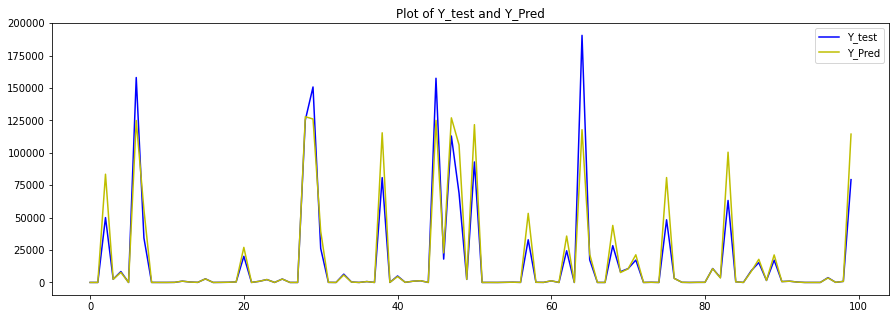

In [ ]:
# 2.e.

p = [i for i  in range(len(Y_test))]
plt.figure(figsize=(15,5))
plt.plot(p,Y_test, 'b-', markersize=10, label='Y_test')
plt.plot(p,Y_pred_mean, 'y-', markersize=10, label='Y_Pred')
plt.legend()
plt.title('Plot of Y_test and Y_Pred')
plt.plot()
